#**Option 1: Breast cancer data**




#**TASK 1**


Here we are trying to apply the machine leanring models to classify the individual micros of the patients

    

###### ***Firstly we import the necessary libaries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import RocCurveDisplay, roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


In [ ]:
# Import the data using pandas


np.random.seed(42)
data=pd.read_excel('Reduced Features for TAI project.xlsx')

data


,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


# ***Understanding the data***

Here, we wish to know the statistics related to the data based on each columns

In [ ]:
types=data.dtypes
description=data.describe()

description




,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
count,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,...,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000,3562.000000
mean,43.568782,0.666190,2.462975,0.590587,4.212117,1497.921542,1594.268004,2119.089859,271.458163,2.968610,...,263.808079,0.351824,3.164037,0.159556,0.458397,1.292847,0.931269,0.905466,73.400175,0.432903
std,24.574284,0.168063,0.546251,0.272699,4.286353,1289.535822,1387.119079,1528.700938,218.219184,3.454322,...,2184.304828,0.216732,1.182988,0.162182,0.243215,0.247532,0.035136,0.512119,81.520035,0.495547
min,1.000000,0.039069,0.000000,-1.005865,0.083283,1.000000,1.000000,1.000000,0.000000,0.054849,...,0.030881,0.058536,1.284810,0.000000,0.122810,0.907201,0.811843,0.234128,3.099939,0.000000
25%,28.000000,0.550945,2.153519,0.450615,0.963731,316.233814,327.236986,637.213037,54.969021,0.654501,...,10.276716,0.191192,2.531290,0.043387,0.322079,1.154897,0.902421,0.628734,22.119894,0.000000
50%,41.000000,0.677985,2.371766,0.580983,2.686606,1247.979233,1297.284496,2121.746771,249.695632,1.718228,...,31.876325,0.295743,2.917387,0.086336,0.410345,1.224399,0.920535,0.801215,35.270240,0.000000
75%,63.000000,0.793857,2.665746,0.726457,6.188729,2428.843420,2579.808869,3397.403762,453.547995,3.987678,...,111.915767,0.468013,3.432697,0.248412,0.530553,1.356257,0.962220,1.035546,102.038460,1.000000
max,96.000000,1.000000,8.111111,2.666667,29.198575,6454.319835,6484.443965,6308.111352,913.448742,31.799360,...,99073.022883,2.957963,22.889047,0.929873,5.265915,3.486119,1.000000,9.730689,675.982582,1.000000


In [ ]:
data['Label'].value_counts() # count how many benign and malignant micro calcification a present.

Label
0    2020
1    1542
Name: count, dtype: int64

In [ ]:
# Helps to see, how the columns are linearly dependent to each other

correlation_matrix=data.corr()
correlation_matrix




,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
Patient ID,1.000000,-0.036073,-0.127682,-0.137480,0.175486,0.162884,0.158597,0.165459,0.139317,0.169480,...,0.028000,-0.083122,0.060410,0.044203,-0.101747,-0.077969,0.069212,-0.090845,0.029903,0.835652
original_shape_Elongation,-0.036073,1.000000,-0.157728,-0.129982,-0.027935,-0.002718,0.022697,0.048441,0.014654,-0.041520,...,-0.062346,-0.014623,0.050018,-0.056311,-0.036797,-0.360294,-0.030738,-0.027682,-0.021997,-0.032919
original_firstorder_Kurtosis,-0.127682,-0.157728,1.000000,0.869611,-0.151952,-0.154487,-0.141599,-0.115337,-0.116763,-0.195293,...,0.036557,0.079540,-0.079033,0.003824,0.138577,0.325718,-0.030867,0.103156,-0.036610,-0.163841
original_firstorder_Skewness,-0.137480,-0.129982,0.869611,1.000000,-0.226308,-0.243797,-0.217088,-0.180155,-0.185866,-0.299874,...,-0.012302,0.096575,-0.115011,0.010955,0.143290,0.230066,-0.034228,0.132802,-0.065263,-0.177288
wavelet-LHL_glrlm_RunVariance,0.175486,-0.027935,-0.151952,-0.226308,1.000000,0.835214,0.826354,0.896881,0.768187,0.834363,...,0.086452,-0.082203,0.358498,0.206526,-0.100707,0.293371,0.190786,-0.188822,0.354493,0.237717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
original_shape_SphericalDisproportion,-0.077969,-0.360294,0.325718,0.230066,0.293371,0.325032,0.270475,0.313439,0.323871,0.276716,...,0.187117,0.062811,0.140384,0.016874,0.113853,1.000000,0.069065,0.054867,0.207693,-0.073276
wavelet2-HHL_glcm_Idmn,0.069212,-0.030738,-0.030867,-0.034228,0.190786,0.021081,0.313939,0.147824,0.051313,0.049115,...,0.042801,0.535752,0.229595,0.570686,0.274828,0.069065,1.000000,0.286728,0.693443,0.077333
wavelet2-LHH_firstorder_RootMeanSquared,-0.090845,-0.027682,0.103156,0.132802,-0.188822,-0.321950,-0.207816,-0.237525,-0.297741,-0.268508,...,-0.035990,0.688454,0.044603,0.221137,0.896830,0.054867,0.286728,1.000000,0.251023,-0.088546
wavelet2-HLL_firstorder_Maximum,0.029903,-0.021997,-0.036610,-0.065263,0.354493,0.230627,0.472928,0.329578,0.262118,0.220256,...,0.053736,0.491352,0.287304,0.688068,0.294406,0.207693,0.693443,0.251023,1.000000,0.047379


In [ ]:
data.isna().sum().to_dict() # checking whether there is the presence of missing value

{'Patient ID': 0,
 'original_shape_Elongation': 0,
 'original_firstorder_Kurtosis': 0,
 'original_firstorder_Skewness': 0,
 'wavelet-LHL_glrlm_RunVariance': 0,
 'wavelet2-LHL_gldm_LargeDependenceEmphasis': 0,
 'wavelet2-LLH_gldm_LargeDependenceEmphasis': 0,
 'wavelet-LHL_gldm_LargeDependenceEmphasis': 0,
 'wavelet2-LHL_gldm_DependenceVariance': 0,
 'wavelet2-LHL_glrlm_RunVariance': 0,
 'wavelet-LHL_glrlm_LongRunEmphasis': 0,
 'wavelet-LHH_glrlm_LongRunEmphasis': 0,
 'wavelet-LHH_glrlm_RunPercentage': 0,
 'wavelet2-LLH_glrlm_RunVariance': 0,
 'wavelet-LHH_glrlm_RunLengthNonUniformityNormalized': 0,
 'wavelet-HHH_glrlm_LongRunEmphasis': 0,
 'wavelet-LHH_glrlm_RunVariance': 0,
 'wavelet2-LLH_glrlm_LongRunEmphasis': 0,
 'wavelet2-LHL_glrlm_LongRunEmphasis': 0,
 'wavelet-HHH_glrlm_RunVariance': 0,
 'wavelet2-LHH_glrlm_LongRunEmphasis': 0,
 'wavelet2-LHH_glrlm_RunPercentage': 0,
 'wavelet-LHL_glrlm_RunPercentage': 0,
 'wavelet-HHH_glrlm_RunLengthNonUniformityNormalized': 0,
 'wavelet2-HHH_gl

We realize that there was no presence of missing or any NaN values in the data

# ***Visualisation***

Here, we now visualize the data, through various graphs

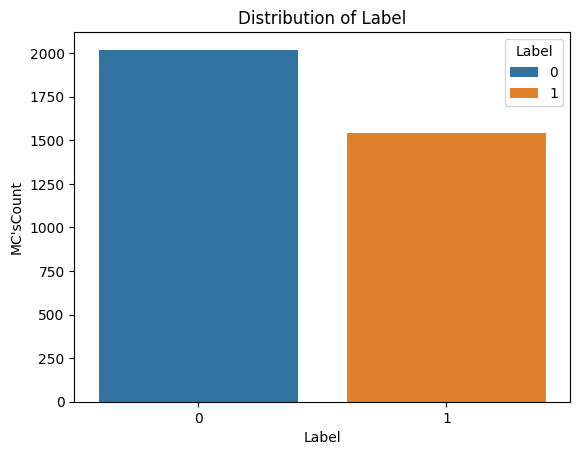

In [ ]:
# Showing the distribution of the begnign and the malignant classes
sns.countplot(x='Label', hue='Label', data=data)
plt.xlabel('Label')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Label')
plt.show()

# ***Data Splitting***

It will be important to split the data in a way that every patient id's appears in only one group and not in both group.
Also, the spliting should be balanced.



##### Below, we try to do a manual spliting based on the patient id to avoid data snooping, as  well as a good distributed and independent  split of patients data.  We tried several options to find the best split of the training set in such a way that there is equal distribution of the classes.

In [ ]:



np.random.seed(42)

# Since there are multiple instances of thesame patients, we extract the unique patient ID which we store in patient_id
patient_id=list(np.unique(data['Patient ID'].to_list()))

# In order to have a good splitting, we shuffle the list of patient_id
shuffled_patient_id=random.sample(patient_id,len(patient_id),)

# We manually calculated the percentage of the ID to be kept in each data set and split use list slicing to divide the patient
train_id=shuffled_patient_id[0:68] #  Taking 70% of the patient Id
validation_id=shuffled_patient_id[68:82] # Taking 15% of the patient Id
test_id=shuffled_patient_id[82:] # Taking 15% of the patient Id







###### After several attempts to find the appropriate shuffling of the patient's ID that will give us an equal distribution of the classes, we succeeded to have an approximately equal distribution of the classes in the training set and  saved the ordering of the patient's ID for the final machine learning learning algorithm. This can be seen in the plots below. We could know which shuffling gives the best distribution of the classes by constantly ploting the graph and seeing the level of each classes.

In [ ]:
# This is a list of Id after the shuffling has been made.
best_patientID_shulffling=[26,87,10,44,78,18,90,40,15,65,66,1,94,29,80,36,82,3,5,2,62,19,28,47,32,45,39,50,52,92,23,53,64,63,67,49,
         33,56,60,20,81,71,75,51,14,46,95,74,21,12,68,77,31,61,91, 22,27,89,48,69,17,42,58,6,55,13,9,57,84,41,38,76,
         83,11,79,34,24,70,7,30,35,88,86,8,72,37,96,85,93,25,73,43,59,4,54,16]

train_id=best_patientID_shulffling[0:68] #  Taking 70% of the patient Id
validation_id=best_patientID_shulffling[68:82] # Taking 15% of the patient Id
test_id=best_patientID_shulffling[82:] # Taking 15% of the patient Id





# Creating a mask of all the sets (train,validation and test)  based on the different Ids
train_mask = data['Patient ID'].isin(train_id)
val_mask = data['Patient ID'].isin(validation_id)
test_mask = data['Patient ID'].isin(test_id)

# Extracting the training set based on the training mask, it locates all the patient ID where the mask is true and extract them into a dataframe
# This is and idea taken from https://stackoverflow.com/questions/23745677/filtering-pandas-data-frame-by-a-list-of-ids
train_set=data.loc[train_mask]

train_set

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
0,1,0.661690,2.817688,0.769536,7.257078,3381.734540,3715.077716,3546.818663,634.748331,6.682128,...,4005.210235,0.408974,2.949406,0.231474,0.473838,1.572473,0.983853,0.875074,142.866201,0
1,1,0.750849,2.084800,0.442780,3.137745,2653.808184,1443.697357,2297.305200,616.359443,4.095513,...,32.058217,0.282009,2.790798,0.010531,0.401979,1.178144,0.905124,0.696716,21.693040,0
2,1,0.619781,2.590759,0.384512,7.005413,3551.125894,3568.780890,3342.865490,426.661231,8.535867,...,63032.030205,0.442902,3.211156,0.276207,0.446076,1.615550,0.993054,0.832938,163.039718,0
3,2,0.388733,2.932863,0.738215,2.178815,1564.039548,1370.065913,1839.930320,318.122386,1.939531,...,147.649047,0.330143,3.054401,0.023870,0.399957,1.306885,0.911141,0.727764,22.979554,0
4,2,0.820531,2.814081,0.773252,1.316850,1377.981413,1005.602230,1164.799257,325.473446,1.726775,...,65.872763,0.278449,2.074076,0.016973,0.350459,1.165727,0.906515,0.606753,24.490320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3543,94,0.903294,2.060759,0.475617,1.615187,897.217687,1002.891156,1835.122449,165.275950,1.248995,...,9.862170,0.368596,2.691046,0.262705,0.257139,1.127145,0.961574,0.651836,137.805990,1
3544,94,0.678843,2.430997,0.580217,1.127084,645.752941,348.764706,1094.364706,112.414671,0.992645,...,5.515037,0.538336,2.705407,0.140620,0.570534,1.113225,0.995768,1.215382,72.951806,1
3545,95,0.836626,2.850887,0.943540,0.201798,6.000000,5.714286,11.857143,2.000000,0.094183,...,1.298333,0.247995,1.648307,0.098363,0.597463,1.034030,0.847963,4.291232,33.718859,1
3546,95,0.720369,2.268286,0.478456,1.835149,948.406699,475.784689,1591.009569,247.550743,1.253677,...,22.801003,0.144253,3.609408,0.043102,0.259900,1.184466,0.946014,0.565874,28.983949,1


***Training set***

In [ ]:
# After obtaining the training set, we remove the patient ID and the label and divide it into the features and the labels


X_train=train_set.drop(['Patient ID','Label'],axis=1)
y_train=train_set['Label']


train_set['Label'].value_counts()

Label
0    1190
1    1161
Name: count, dtype: int64

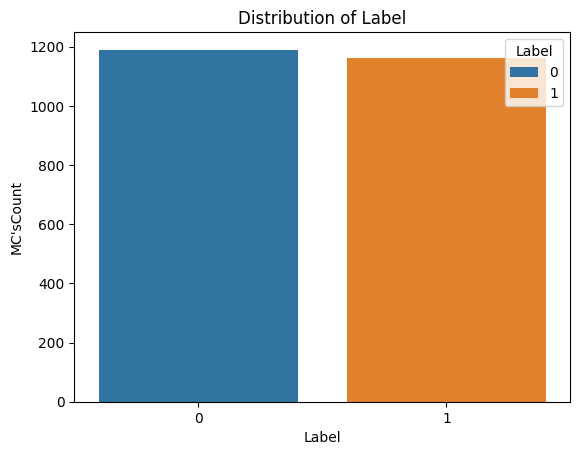

In [ ]:
# This diagram shows the class  distrubiton of the training set

sns.countplot(x='Label', hue='Label', data=train_set)
plt.xlabel('Label')
plt.ylabel('MC\'sCount')
plt.title('Distribution of Label')
plt.show()

***Validation set***

In [ ]:
# Validation set

val_set=data.loc[val_mask]



val_id=val_set['Patient ID']
X_val=val_set.drop(['Patient ID','Label'],axis=1)
y_val=val_set['Label']

val_set

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
260,7,0.542171,2.460003,0.570667,8.771130,2431.105968,1612.027101,3798.104750,442.961697,4.286919,...,7.221810,0.244659,3.108430,0.047863,0.342224,1.412522,0.906948,0.617458,30.912704,0
261,7,0.784022,2.330854,0.538124,0.734654,105.279070,147.465116,402.255814,12.134127,0.409319,...,34.522569,0.171202,2.850983,0.178783,0.290375,1.091772,0.930698,0.814022,19.845533,0
262,7,0.785754,2.291727,0.543875,3.083141,1961.894340,567.430189,2305.611321,435.296746,2.673467,...,4.386576,0.303230,3.332706,0.030014,0.371768,1.266279,0.903066,0.739665,25.651506,0
263,7,0.650550,2.404958,0.619498,4.743068,729.102124,1552.240398,2609.229553,165.570735,1.197447,...,2.955577,0.917180,3.621505,0.153924,1.215180,1.354298,0.962226,2.261538,75.625282,0
264,7,0.766799,2.012536,0.337254,2.672922,2014.450602,437.896386,2164.522892,455.627987,2.686583,...,5.397797,0.290394,2.616418,0.015891,0.321496,1.213634,0.904345,0.621977,38.673259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3427,88,0.762887,2.726158,0.757469,6.384414,1793.815256,3901.906635,3540.865713,523.234078,2.665468,...,2.491195,0.531091,7.401934,0.615590,0.450846,1.154289,0.982877,0.847665,266.792520,1
3428,88,0.749806,1.873916,0.337228,13.300966,3991.045231,4343.723988,4410.046298,588.433395,11.245566,...,412.255766,0.398559,3.571685,0.331418,0.495890,1.194333,0.950230,0.955719,338.701178,1
3429,88,0.805805,2.605100,0.730626,4.762829,1761.559551,984.231461,3194.206742,298.883823,2.527890,...,7.563273,0.126855,2.356002,0.042255,0.351034,1.182333,0.896531,0.608367,15.054460,1
3430,88,0.842732,2.358357,0.585098,6.007646,3059.152403,1546.470106,3816.085580,565.596077,4.679580,...,3.970815,0.127562,2.756159,0.022492,0.356453,1.167829,0.899110,0.652277,15.738345,1


***Test Set***

In [ ]:
# testing data
test_set=data.loc[test_mask]

test_id=test_set['Patient ID']
X_test=test_set.drop(['Patient ID','Label'],axis=1)
y_test=test_set['Label']
test_set

,Patient ID,original_shape_Elongation,original_firstorder_Kurtosis,original_firstorder_Skewness,wavelet-LHL_glrlm_RunVariance,wavelet2-LHL_gldm_LargeDependenceEmphasis,wavelet2-LLH_gldm_LargeDependenceEmphasis,wavelet-LHL_gldm_LargeDependenceEmphasis,wavelet2-LHL_gldm_DependenceVariance,wavelet2-LHL_glrlm_RunVariance,...,wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis,wavelet2-HHH_firstorder_RootMeanSquared,wavelet2-LLH_firstorder_Kurtosis,wavelet-HHL_glcm_Imc2,wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation,original_shape_SphericalDisproportion,wavelet2-HHL_glcm_Idmn,wavelet2-LHH_firstorder_RootMeanSquared,wavelet2-HLL_firstorder_Maximum,Label
88,4,0.927320,2.381132,0.610762,5.065499,4184.029508,2771.219672,3310.796721,588.356076,7.203507,...,65.926487,0.139842,2.799805,0.048915,0.295352,1.158762,0.890508,0.545397,25.148941,0
89,4,0.842822,2.140417,0.460667,7.619891,2555.167752,2949.695440,4182.680782,368.006019,3.996644,...,86.007404,0.147351,3.167862,0.033370,0.308842,1.156576,0.893414,0.552325,12.890434,0
90,4,0.452827,1.881952,0.042606,7.910528,4503.624514,3158.693114,3727.430549,687.723537,13.508916,...,36.820537,0.168918,3.047252,0.060495,0.399460,1.333528,0.890827,0.714095,19.635607,0
91,4,0.970101,1.782122,-0.171807,7.894186,4105.508483,2906.720007,3581.461976,617.869027,11.424178,...,19.442737,0.241803,3.484723,0.028652,0.297503,1.233881,0.904520,0.532150,24.823426,0
92,4,0.629679,1.712488,0.026727,14.121795,4579.765789,4398.712370,4554.018700,714.271427,15.501330,...,1476.915642,0.447102,3.057768,0.188538,0.491219,1.262188,0.938792,0.896522,197.075395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,96,0.225097,3.145095,0.887252,0.507042,113.521739,63.289855,158.304348,21.194707,0.420766,...,22.156250,0.148424,2.383944,0.025038,0.236198,1.412431,0.924402,0.649229,27.270149,1
3558,96,0.503842,2.484876,0.655281,4.641217,2475.349595,2771.461923,2684.326511,574.123960,4.591888,...,450.172765,0.403421,3.311709,0.546492,0.400437,1.494975,0.992242,0.734152,288.610250,1
3559,96,0.454726,3.363199,1.026167,6.014596,3310.430153,1430.379898,3536.925043,548.184562,5.595325,...,336.564815,0.114790,3.124013,0.028680,0.319474,1.609656,0.895515,0.566488,14.823064,1
3560,96,0.624101,2.205947,0.349004,1.626775,921.056338,280.690141,1045.957746,148.842690,1.583895,...,14.416448,0.131801,2.174953,0.072674,0.254557,1.280580,0.895171,0.542009,15.171972,1


## ***Model fitting***

Here, we are going to fit our model and evaluate the performance of the model.


Our models is fitted and evaluated on three models, which include,

1.   Logistic Regression
2.   Support Vector Machine
3.   Random Forest


Firslty, we will start by training the model on the original data.







#### ***Training of the logistic regression***

In this section, we will train the logistics regression and then evaluate the model on the validation set

In [ ]:
# training the logistic regression


logistic_regression=LogisticRegression(max_iter=1000)

logistic_regression.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

#### ***Training of the support vector machine***

In [ ]:
support_vector=SVC(probability=True)


support_vector.fit(X_train,y_train)


SVC(probability=True)

#### ***Training of the Random Forest***

In [ ]:
random_forest=RandomForestClassifier()

random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Obtaining the predictions

logistic_regression_preds=logistic_regression.predict(X_val)
support_vecto_preds=support_vector.predict(X_val)
random_forest_preds=random_forest.predict(X_val)

#### **Evaluation of the three models**

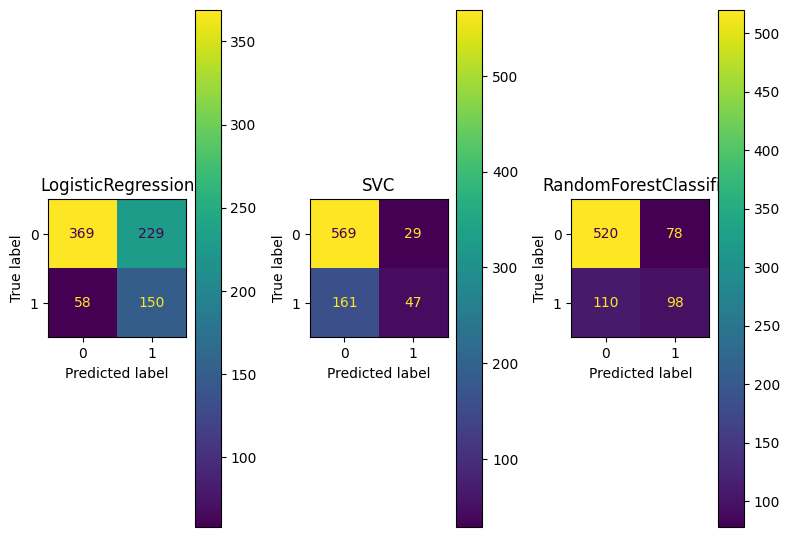

In [ ]:
# https://stackoverflow.com/questions/61016110/plot-multiple-confusion-matrices-with-plot-confusion-matrix

classifiers=[logistic_regression,support_vector,random_forest]
def confusion_matrix_visualisation(classifiers,X_data_set,y_data_set):
  fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(8,10))

  for classifier,ax in zip(classifiers,axes.flatten()):

    ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(y_data_set,classifier.predict(X_data_set)),
        display_labels=classifier.classes_
        ).plot(ax=ax)

    ax.title.set_text(type(classifier).__name__)

  plt.tight_layout()

  plt.show()

confusion_matrix_visualisation(classifiers,X_val,y_val)


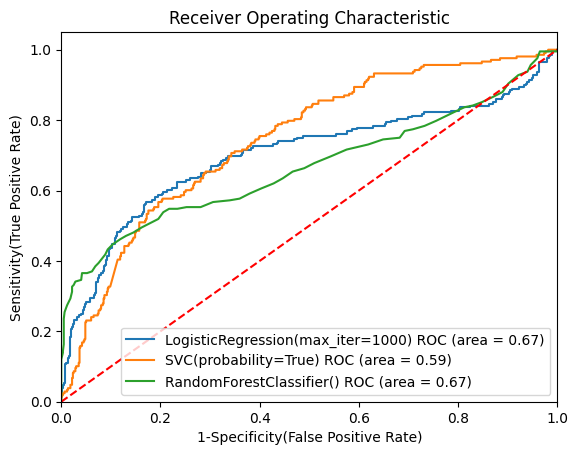

In [ ]:
# Plotting of the area under the roc curve
# https://stackoverflow.com/questions/42894871/how-to-plot-multiple-roc-curves-in-one-plot-with-legend-and-auc-scores-in-python


def roc_auc_visualisation(classifiers,X_data_set,y_data_set):
  for classifier in classifiers:
      y_pred=classifier.predict(X_data_set) # predict the test data
  # Compute False postive rate, and True positive rate
      fpr, tpr, thresholds =roc_curve(y_data_set, classifier.predict_proba(X_data_set)[:,1])
  # Calculate Area under the curve to display on the plot
      auc =roc_auc_score(y_data_set,classifier.predict(X_data_set))
  # Now, plot the computed values
      plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (classifier, auc))
  # Custom settings for the plot
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('1-Specificity(False Positive Rate)')
  plt.ylabel('Sensitivity(True Positive Rate)')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()   # Display

roc_auc_visualisation(classifiers,X_val,y_val)

In [ ]:
# Classification report

def classification_report_visualisation(classifiers,X_data_set,y_data_set):
  for classifier in classifiers:
     y_preds=classifier.predict(X_data_set)
     print(type(classifier).__name__)
     print(classification_report(y_data_set,y_preds))
     print()

classification_report_visualisation(classifiers,X_val,y_val)

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.62      0.72       598
           1       0.40      0.72      0.51       208

    accuracy                           0.64       806
   macro avg       0.63      0.67      0.62       806
weighted avg       0.74      0.64      0.67       806


SVC
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       598
           1       0.62      0.23      0.33       208

    accuracy                           0.76       806
   macro avg       0.70      0.59      0.59       806
weighted avg       0.74      0.76      0.72       806


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       598
           1       0.56      0.47      0.51       208

    accuracy                           0.77       806
   macro avg       0.69      0.67      0.68       806
weighted avg       0.76   

### Having evaluated the models based on the ROC_AUC and the accuracy, one could see that random forest performs best with an accuray score 77% and AUC of 67%. We now try to evaluate the model on the scaled data to observe how each of the model behave. We applied three types of scaling method to inform our choice scaling method.

1.   MinMaxScaler
2.  StandardScaler
3.  RobustScaler



# ***Training of the model over the scaled data***



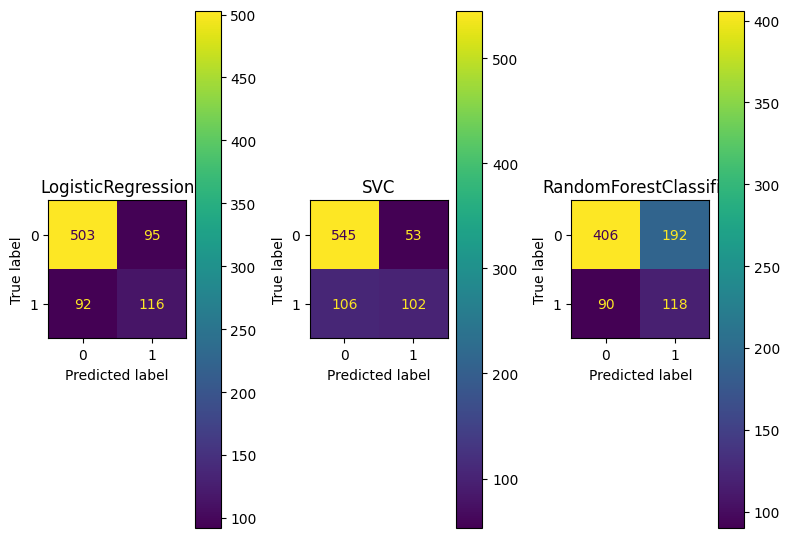

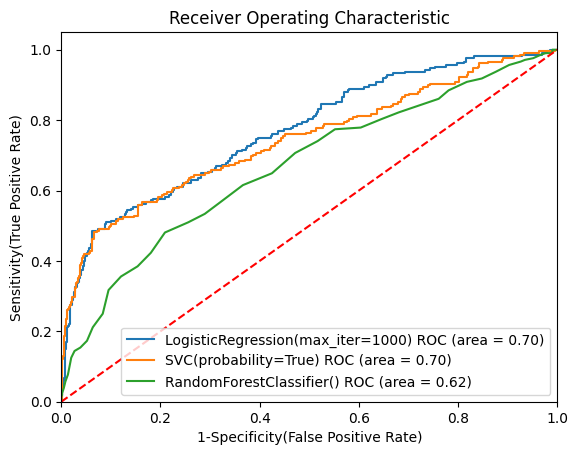

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       598
           1       0.55      0.56      0.55       208

    accuracy                           0.77       806
   macro avg       0.70      0.70      0.70       806
weighted avg       0.77      0.77      0.77       806


SVC
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       598
           1       0.66      0.49      0.56       208

    accuracy                           0.80       806
   macro avg       0.75      0.70      0.72       806
weighted avg       0.79      0.80      0.79       806


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       598
           1       0.38      0.57      0.46       208

    accuracy                           0.65       806
   macro avg       0.60      0.62      0.60       806
weighted avg       0.71   

In [ ]:
# Scaling the Training and the validation set using MinMaxScaler



min_max_scaler=MinMaxScaler()

# Scaling the features with min max scaler
scaled_X_train=min_max_scaler.fit_transform(X_train)
scaled_X_val=min_max_scaler.fit_transform(X_val)

# feating the scaled features
logistic_regression.fit(scaled_X_train,y_train)
support_vector.fit(scaled_X_train,y_train)
random_forest.fit(scaled_X_train,y_train)


# Storing the fitted model in a list
classifiers_on_scaled_data=[logistic_regression,support_vector,random_forest]


# Evaluating each model
confusion_matrix_visualisation(classifiers,scaled_X_val,y_val)
roc_auc_visualisation(classifiers,scaled_X_val,y_val)
classification_report_visualisation(classifiers,scaled_X_val,y_val)





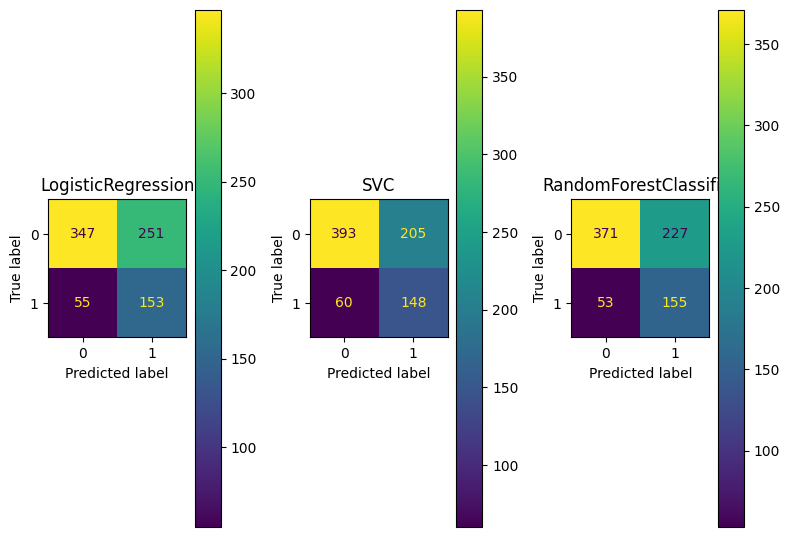

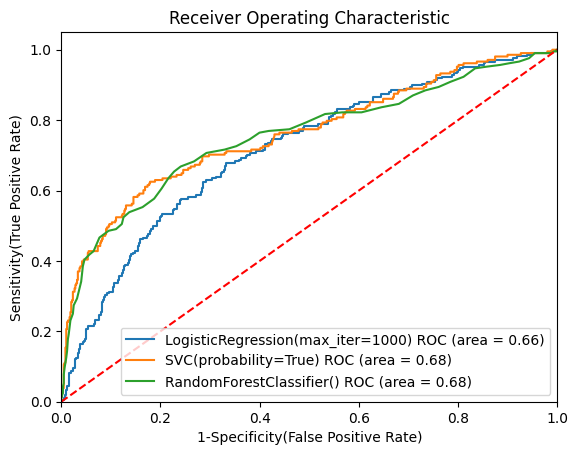

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.58      0.69       598
           1       0.38      0.74      0.50       208

    accuracy                           0.62       806
   macro avg       0.62      0.66      0.60       806
weighted avg       0.74      0.62      0.64       806


SVC
              precision    recall  f1-score   support

           0       0.87      0.66      0.75       598
           1       0.42      0.71      0.53       208

    accuracy                           0.67       806
   macro avg       0.64      0.68      0.64       806
weighted avg       0.75      0.67      0.69       806


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.88      0.62      0.73       598
           1       0.41      0.75      0.53       208

    accuracy                           0.65       806
   macro avg       0.64      0.68      0.63       806
weighted avg       0.75   

In [ ]:
# Scaling the Training and the validation set using standardScaler



standard_scaler=StandardScaler()

# Scaling the features with standard scaler
scaled_X_train=standard_scaler.fit_transform(X_train)
scaled_X_val=standard_scaler.fit_transform(X_val)

# feating the scaled features
logistic_regression.fit(scaled_X_train,y_train)
support_vector.fit(scaled_X_train,y_train)
random_forest.fit(scaled_X_train,y_train)


# Storing the fitted model in a list
classifiers_on_scaled_data=[logistic_regression,support_vector,random_forest]


# Evaluating each model
confusion_matrix_visualisation(classifiers,scaled_X_val,y_val)
roc_auc_visualisation(classifiers,scaled_X_val,y_val)
classification_report_visualisation(classifiers,scaled_X_val,y_val)

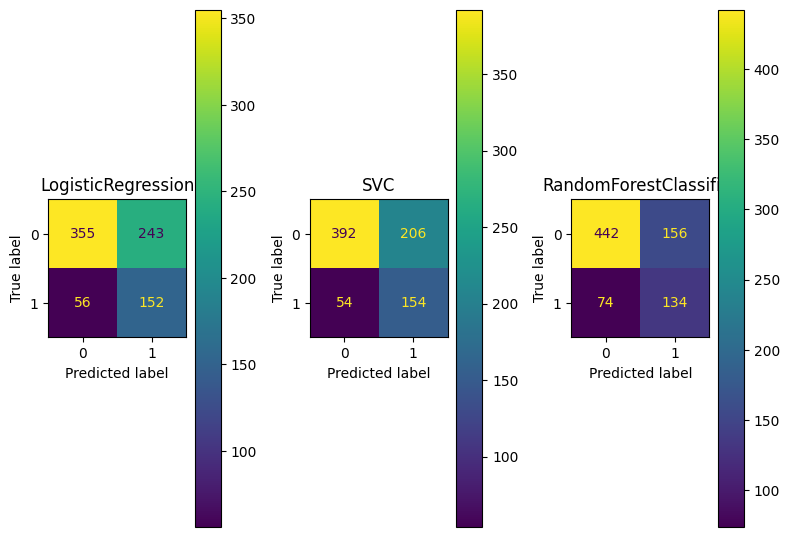

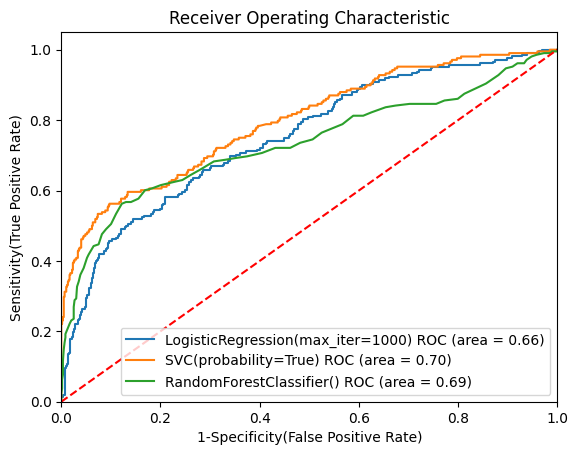

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.59      0.70       598
           1       0.38      0.73      0.50       208

    accuracy                           0.63       806
   macro avg       0.62      0.66      0.60       806
weighted avg       0.74      0.63      0.65       806


SVC
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       598
           1       0.43      0.74      0.54       208

    accuracy                           0.68       806
   macro avg       0.65      0.70      0.65       806
weighted avg       0.76      0.68      0.70       806


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       598
           1       0.46      0.64      0.54       208

    accuracy                           0.71       806
   macro avg       0.66      0.69      0.67       806
weighted avg       0.75   

In [ ]:
robust_scaler=RobustScaler()

# Scaling the features with robust scaler
scaled_X_train=robust_scaler.fit_transform(X_train)
scaled_X_val=robust_scaler.fit_transform(X_val)

# feating the scaled features
logistic_regression.fit(scaled_X_train,y_train)
support_vector.fit(scaled_X_train,y_train)
random_forest.fit(scaled_X_train,y_train)


# Storing the fitted model in a list
classifiers_on_scaled_data=[logistic_regression,support_vector,random_forest]


# Evaluating each model
confusion_matrix_visualisation(classifiers,scaled_X_val,y_val)
roc_auc_visualisation(classifiers,scaled_X_val,y_val)
classification_report_visualisation(classifiers,scaled_X_val,y_val)

##### **The MinMaxScaler gave an overall better performance for three models with Logistic Regression (accuracy of 77%, AUC of 70% ), SVM classifier (accuracy of 80%, AUC of 70%) and Random Forest(accuracy 65%, AUC 62%)**

# ***Feature Selection***

#### After the performing the scaling, using the different scaling data methods, we decided to perform features selection of the data in order to reduce the overfiting due to high dimensionality. In order to extract the appropriate features. For the feature selection we applied Recursive Feature Elimination with Cross Validation (RFECV). This was inspired by this acticle https://bmccancer.biomedcentral.com/articles/10.1186/s12885-021-09133-4  which used the RFE.

This was evlauated on the Random forest model, since it uses the decision tree, we taught it will be the best model to evaluate the appropriate columns.

RFECV selects different subsets of features and evaluate thier significance based on the classification performance on the different folds and the number of featurs return. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV

# ***This image shows the real time computation of the feature selection code below, but due to computational power and time running the said code tooks us about 2hours + to be completed 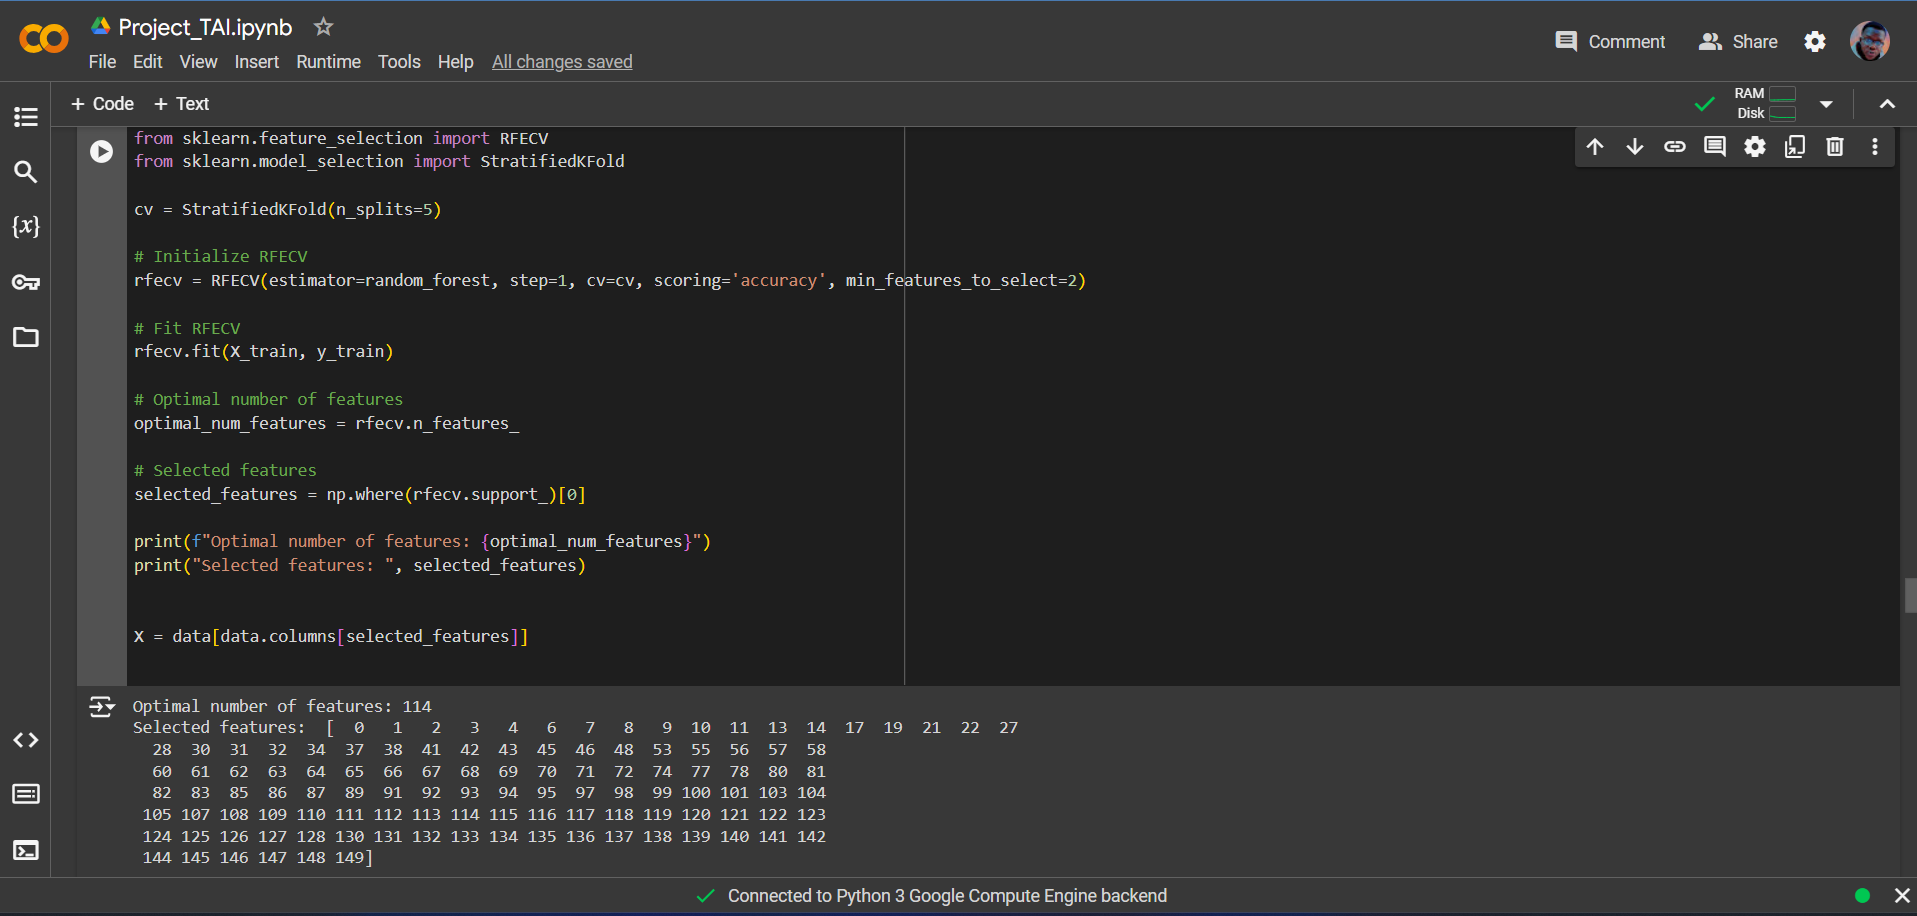***

In [ ]:


# cv = StratifiedKFold(n_splits=5)

# # Initialize RFECV
# rfecv = RFECV(estimator=random_forest, step=1, cv=cv, scoring='accuracy', min_features_to_select=2)

# # Fit RFECV
# rfecv.fit(X_train, y_train)

# # Optimal number of features
# optimal_num_features = rfecv.n_features_

# # Selected features
# selected_features = np.where(rfecv.support_)[0]

# print(f"Optimal number of features: {optimal_num_features}")
# print("Selected features: ", selected_features)




The list of the selected features was obtained from the RFECV algorithm. We commented the code to avoid a long computation time in running the code

In [ ]:
selected_features=[0,  1 ,2 ,3 ,4 , 6 ,7 ,8 ,9,10 ,11 ,13 ,14 ,17 ,19 ,21 ,22 ,27,
  28 , 30,  31,  32,  34,  37,  38,  41,  42,  43 , 45,  46,  48,  53,  55,  56,  57,  58,
  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  74,  77,  78,  80,  81,
  82 , 83  ,85  ,86  ,87  ,89  ,91  ,92  ,93  ,94  ,95  ,97  ,98 , 99 ,100 ,101 ,103 ,104,
 105 ,107 ,108 ,109 ,110 ,111 ,112, 113, 114, 115, 116, 117, 118 ,119 ,120 ,121 ,122 ,123,
 124 ,125 ,126 ,127 ,128 ,130, 131, 132 ,133, 134 ,135, 136, 137 ,138, 139, 140 ,141, 142,
 144 ,145 ,146 ,147 ,148 ,149]

selected_columns=data.columns[selected_features]

selected_columns

Index(['Patient ID', 'original_shape_Elongation',
       'original_firstorder_Kurtosis', 'original_firstorder_Skewness',
       'wavelet-LHL_glrlm_RunVariance',
       'wavelet2-LLH_gldm_LargeDependenceEmphasis',
       'wavelet-LHL_gldm_LargeDependenceEmphasis',
       'wavelet2-LHL_gldm_DependenceVariance',
       'wavelet2-LHL_glrlm_RunVariance', 'wavelet-LHL_glrlm_LongRunEmphasis',
       ...
       'wavelet2-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet2-HLL_firstorder_RootMeanSquared',
       'wavelet-HHH_glrlm_LongRunHighGrayLevelEmphasis',
       'wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis',
       'wavelet2-LLH_firstorder_Kurtosis', 'wavelet-HHL_glcm_Imc2',
       'wavelet2-LHH_firstorder_RobustMeanAbsoluteDeviation',
       'original_shape_SphericalDisproportion', 'wavelet2-HHL_glcm_Idmn',
       'wavelet2-LHH_firstorder_RootMeanSquared'],
      dtype='object', length=114)

# ***Training and evaluating the models on the selected features***

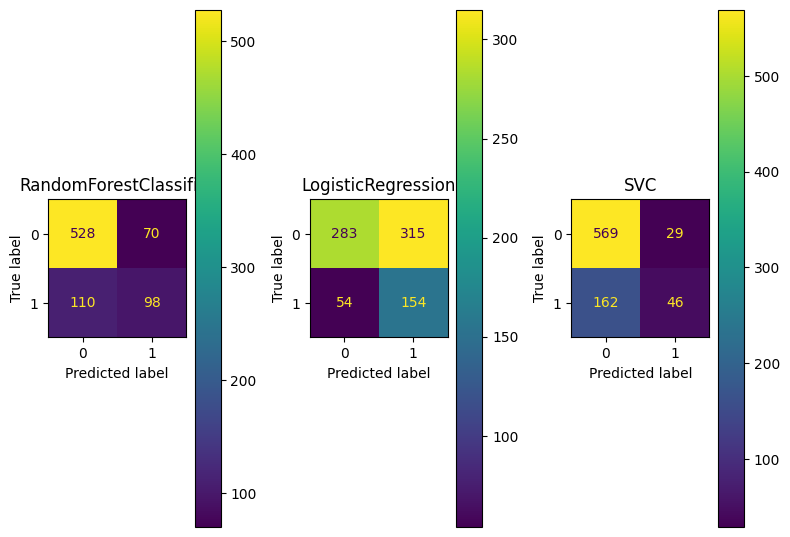

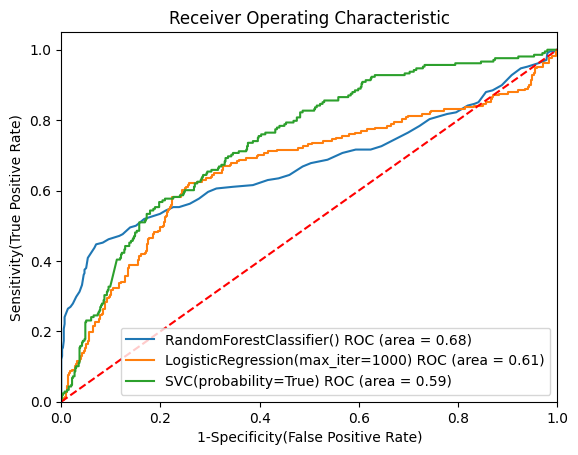

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       598
           1       0.58      0.47      0.52       208

    accuracy                           0.78       806
   macro avg       0.71      0.68      0.69       806
weighted avg       0.76      0.78      0.77       806


LogisticRegression
              precision    recall  f1-score   support

           0       0.84      0.47      0.61       598
           1       0.33      0.74      0.45       208

    accuracy                           0.54       806
   macro avg       0.58      0.61      0.53       806
weighted avg       0.71      0.54      0.57       806


SVC
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       598
           1       0.61      0.22      0.33       208

    accuracy                           0.76       806
   macro avg       0.70      0.59      0.59       806
weighted avg       0.74   

In [ ]:
# Using the feature selected, we train the different models
selected_X_train=X_train[X_train.columns[selected_features]]
selected_X_val=X_val[X_val.columns[selected_features]]

random_forest.fit(selected_X_train,y_train)
logistic_regression.fit(selected_X_train,y_train)
support_vector.fit(selected_X_train,y_train)



classifier_on_selected_features=[random_forest,logistic_regression,support_vector]

confusion_matrix_visualisation(classifier_on_selected_features,selected_X_val,y_val)
roc_auc_visualisation(classifier_on_selected_features,selected_X_val,y_val)
classification_report_visualisation(classifier_on_selected_features,selected_X_val,y_val)




Random Forest with the selected features performed best than the other model with an accuracy of 78% and an AUC of 68%

# ***Training and evaluating the models on the selected and scaled features***

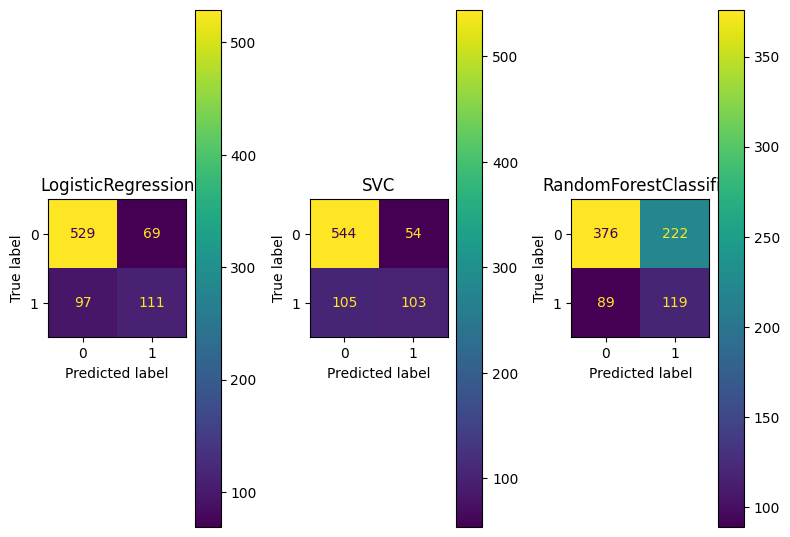

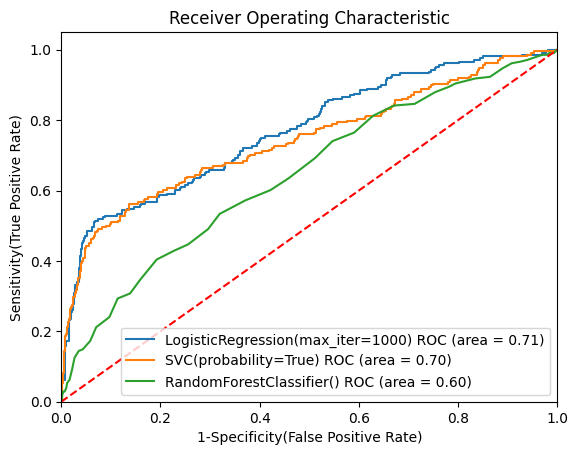

LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       598
           1       0.62      0.53      0.57       208

    accuracy                           0.79       806
   macro avg       0.73      0.71      0.72       806
weighted avg       0.79      0.79      0.79       806


SVC
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       598
           1       0.66      0.50      0.56       208

    accuracy                           0.80       806
   macro avg       0.75      0.70      0.72       806
weighted avg       0.79      0.80      0.79       806


RandomForestClassifier
              precision    recall  f1-score   support

           0       0.81      0.63      0.71       598
           1       0.35      0.57      0.43       208

    accuracy                           0.61       806
   macro avg       0.58      0.60      0.57       806
weighted avg       0.69   

In [ ]:
min_max_scaler=MinMaxScaler()

# Scaling the features with min max scaler
scaled_X_train_on_sel_features=min_max_scaler.fit_transform(selected_X_train)
scaled_X_val_on_sel_features=min_max_scaler.fit_transform(selected_X_val)

# feating the scaled features
logistic_regression.fit(scaled_X_train_on_sel_features,y_train)
support_vector.fit(scaled_X_train_on_sel_features,y_train)
random_forest.fit(scaled_X_train_on_sel_features,y_train)


# Storing the fitted model in a list
classifiers_on_scaled_data=[logistic_regression,support_vector,random_forest]


# Evaluating each model
confusion_matrix_visualisation(classifiers,scaled_X_val_on_sel_features,y_val)
roc_auc_visualisation(classifiers,scaled_X_val_on_sel_features,y_val)
classification_report_visualisation(classifiers,scaled_X_val_on_sel_features,y_val)





Random Forest with scaled and selected features performed least than the other model with an accuracy of 61% and an AUC of 60%.

# ***Hyper parameter tunning of the three models***

We wish to tune the hyperparameter for random forest with the unscaled selected features where it performed best and tune the the hyperparameter for SVM and Logistic Regression with the scaled selected features where they performed best

In [ ]:
 # Hyper parameter tuning of the logistique regression
lrparam_grid = [
    {'penalty' : ['l1', 'l2', 'none'],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

logistic=LogisticRegression()

logistic_reg_grid_search=GridSearchCV(estimator=logistique,param_grid=lrparam_grid,cv=5)

logistic_reg_grid_search.fit(scaled_X_train_on_sel_features,y_train)

In [ ]:
logistic_reg_grid_search.best_params_

{'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [ ]:
# Hyper parameter of the random forest

RFparam_grid = {
    'n_estimators': [200,300],
    'max_features': ['sqrt'],
    'max_depth' : [4,5],
    'criterion' :['gini'],
    'min_samples_leaf':[3,5],
    'min_samples_split':[2,3]
}

random_grid_search=GridSearchCV(estimator=random_forest,param_grid=RFparam_grid,cv=5)

random_grid_search.fit(scaled_X_train_on_sel_features,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5],
                         'max_features': ['sqrt'], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 300]})

In [ ]:
random_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
# Hyper parameter of the support vector machine
SVM_param_grid = {
    'kernel': ['rbf','poly','linear'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
     'C': [1,10,100,1000]

}

support_vector=SVC()

support_vecor_grid_search=GridSearchCV(estimator=support_vector,param_grid=SVM_param_grid,cv=5)
# support=SVC(kernel='rbf')
support_vecor_grid_search.fit(scaled_X_train_on_sel_features,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']})

In [ ]:
support_vecor_grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}

######***Here we evaluate the models with the tunned hyper parameters***

Having tunned the hyperparameters of the different models, we proceed to fit the model to the training set and evaluate its performance on the validation set to inform our final model selection

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


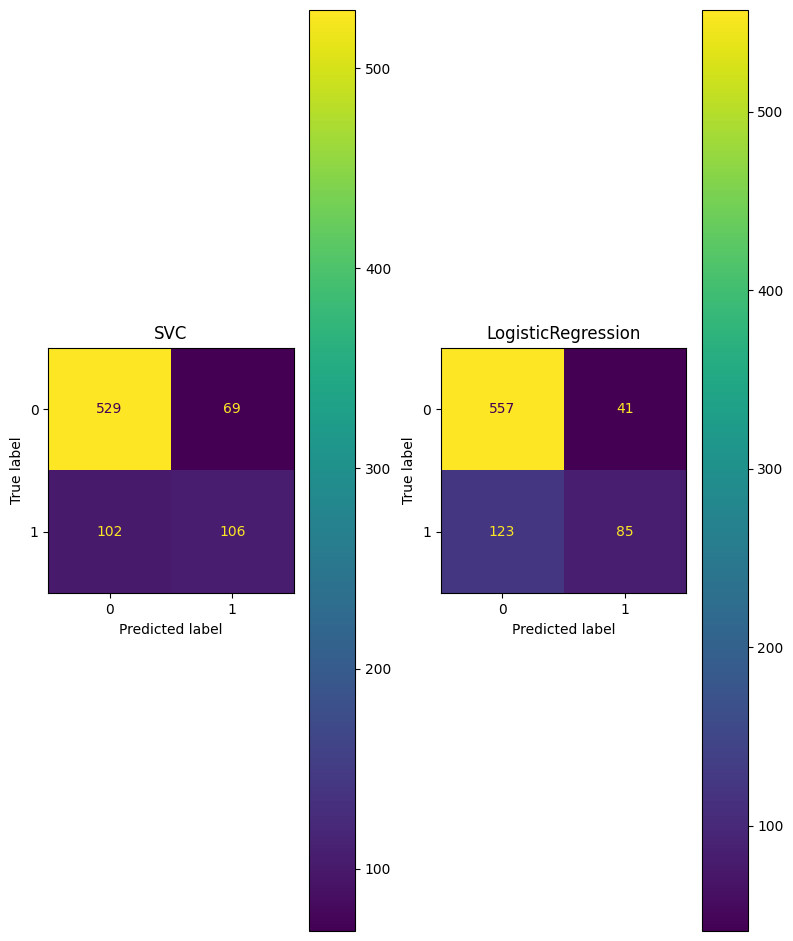

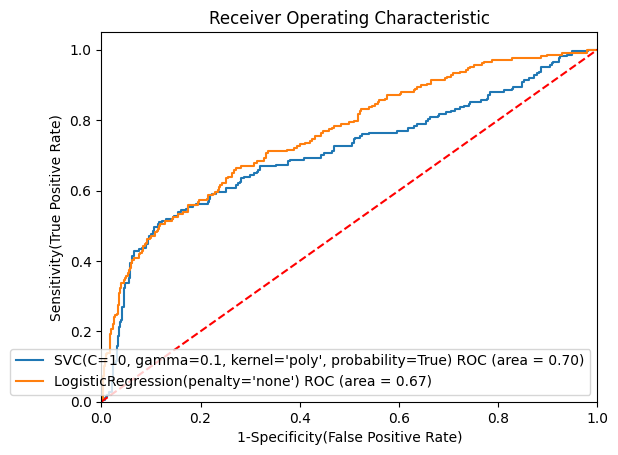

SVC
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       598
           1       0.61      0.51      0.55       208

    accuracy                           0.79       806
   macro avg       0.72      0.70      0.71       806
weighted avg       0.78      0.79      0.78       806


LogisticRegression
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       598
           1       0.67      0.41      0.51       208

    accuracy                           0.80       806
   macro avg       0.75      0.67      0.69       806
weighted avg       0.78      0.80      0.78       806


Random Forest
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       675
           1       0.46      0.73      0.57       131

    accuracy                           0.82       806
   macro avg       0.70      0.78      0.73       806
weighted avg       0.86      0.82  

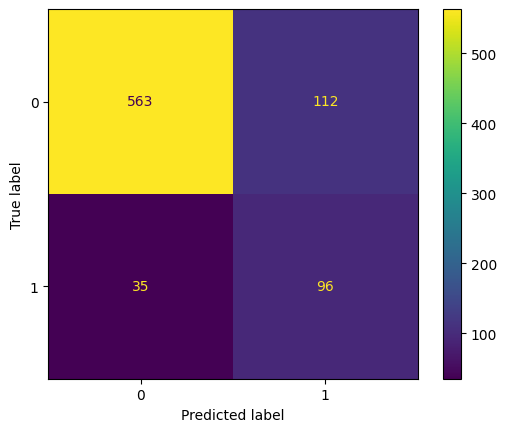

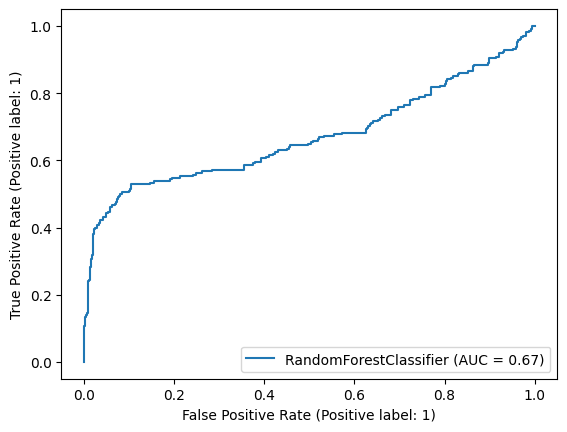

In [ ]:

new_model_random=RandomForestClassifier(random_state=42,criterion='gini',max_depth=5,
                                    max_features='sqrt',min_samples_leaf=3,min_samples_split=2,n_estimators=300)


new_model_support=SVC(kernel='poly',C=10,gamma=0.1,probability=True)


new_model_logistic=LogisticRegression(max_iter=100,penalty='none',solver='lbfgs')




new_model_support.fit(scaled_X_train_on_sel_features,y_train)
new_model_logistic.fit(scaled_X_train_on_sel_features,y_train)
new_model_random.fit(selected_X_train,y_train)

tunned_model=[new_model_support,new_model_logistic]


confusion_matrix_visualisation(tunned_model,scaled_X_val_on_sel_features,y_val)
roc_auc_visualisation(tunned_model,scaled_X_val_on_sel_features,y_val)
classification_report_visualisation(tunned_model,scaled_X_val_on_sel_features,y_val)




print('Random Forest')
y_preds=new_model_random.predict(selected_X_val)
matrix=confusion_matrix(y_preds,y_val)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix)
matrix_display.plot()
RocCurveDisplay.from_estimator(new_model_random,selected_X_val,y_val)
print(classification_report(y_preds,y_val))

##### **Upong all the difference analysis, of the model, it is observe based on the accuracy score 82% and the AUC score 67% that random forest tends to be the best model to be used. Henceforth, this will be the final model on which our test data will be evaluated.**

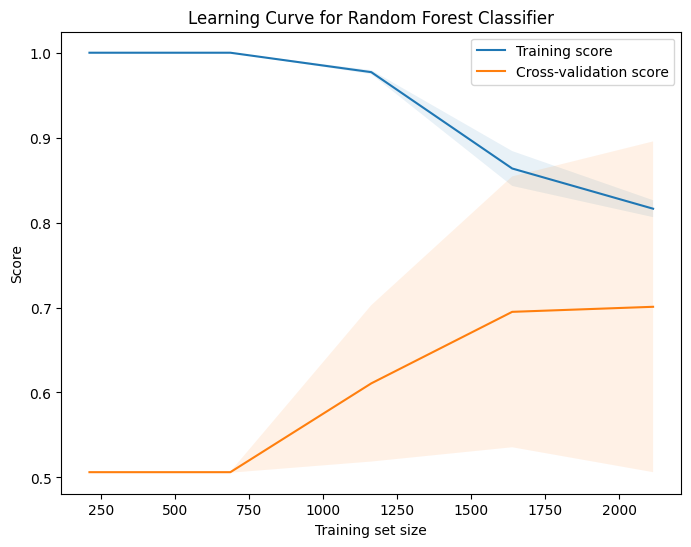

In [ ]:
# Ploting the learning curve of the model.

from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    new_model_random, selected_X_train, y_train, cv=10, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, valid_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes,
                  train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes,
                  valid_scores_mean - valid_scores_std,
                  valid_scores_mean + valid_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('Score')
plt.title('Learning Curve for Random Forest Classifier')
plt.legend()
plt.show()

**More over, based the learning curve, it is seen that the model tends to generalise and would have even generalize more if more data was introduced. Hence this the model is not overfiting**

# ***Final Evaluation of the model on the test set for classifying individual micros***

              precision    recall  f1-score   support

           0       0.95      0.65      0.77       337
           1       0.32      0.82      0.46        68

    accuracy                           0.68       405
   macro avg       0.64      0.74      0.62       405
weighted avg       0.84      0.68      0.72       405



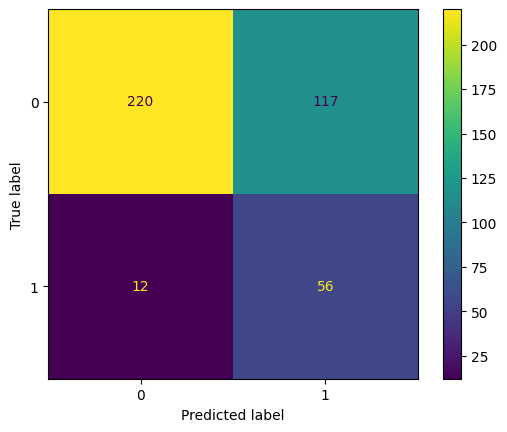

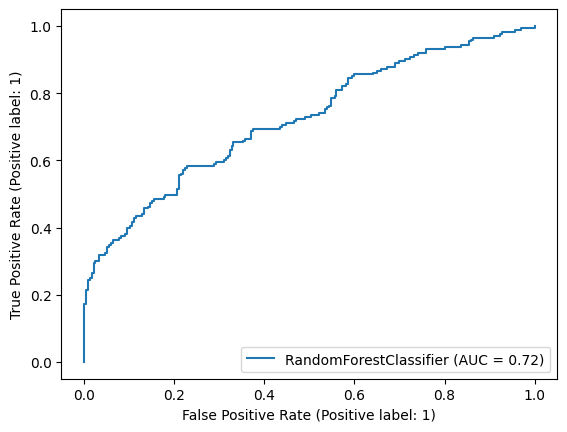

In [ ]:

# Here we evaluate the selected model on the test set

selected_X_test=X_test[X_test.columns[selected_features]]
y_final_preds=new_model_random.predict(selected_X_test)
matrix=confusion_matrix(y_final_preds,y_test)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix)
matrix_display.plot()
RocCurveDisplay.from_estimator(new_model_random,selected_X_test,y_test)
print(classification_report(y_final_preds,y_test))


#### **Using, the tunned random forest model, we where able to classify the individual micros with an acuray of 68 percent and a AUC of 72 percent.**

# **Task 2**

Using the above predictions, we construct a new dataframe of all the prediction of the first task in order to predict the where the patient has cancer or not based on the micro calcification. This task was performs following the idea of this article. https://bmccancer.biomedcentral.com/articles/10.1186/s12885-021-09133-4

In [ ]:
def task_2_df(data,ID,prediction,column):
    '''
    This is a function that helps create a table for the task two. That is
    the function gathers the predictions of the individual micros, and create a table
    whose columsn consist of the counts of the different predictions for each class of
    each patient
    '''

    # A dictionary whose keys are the patient ID and the predictions of the patient ID
    df_dict = {"patientId":ID ,"Labels":prediction}

    # Create a new data frame
    newdata= pd.DataFrame(df_dict)


    # Returns a boolean where true indicate where the patient Id is found in the data frame
    mask = data[column].isin(newdata['patientId'].to_list())

    # Using the mask, creates a new data frame
    data_set=data.loc[mask]

    # Just return the unique patient ID, that we wish to extract the true label of the patient
    # That is whether the patient is cancerous or not. This will be
    # joined to the data created to serve as a ground truth for the evaluation of the mode
    final_df = data_set.drop_duplicates(subset=[column])


    # Finding the exact labels of the patients
    labels=final_df['Label'].to_list()

    # Finding the total number of micros of each patient

    patient_count = []
    # Goes throught the list of ID in the new  frame optained above
    for i in np.unique(newdata['patientId'].to_list()):
      # In the prediction of each individual patient, verifies whether a zero or a one is present
        if 0 in newdata[newdata['patientId']==i]['Labels'].to_list() or 1 in newdata[newdata['patientId']==i]['Labels'].to_list():
            # If a zero is present, it keeps the dataframe whose label are only zero, converts it to as list
            # In case it is one, it keeps the dataframe whose label are only ones, converts it to as list
            # This does for each patient id 'i'
            patient_extract= newdata[newdata['patientId']==i]['Labels'].to_list()
            #  Append to the patient_count a list containing the patient ID 'i', the counts of the zero and ones
            patient_count.append([i,patient_extract.count(0),patient_extract.count(1)])

    # Creates a data frame containing the patient_count, whose columsn are "Patient ID", "Label 0","Label 1
    task2_df=pd.DataFrame(patient_count,columns=["Patient ID", "Label 0","Label 1"])
    # Includes the true labels of each patient to the dataframe
    task2_df['True Labels']=labels
    # Calculated the percentage in which each zeros and ones appear in the predictions of individual micros of each patient
    # It Creates a new colums containing the proportion of each classes for each patient
    task2_df['Label 0 percentage']=(task2_df['Label 0']/(task2_df['Label 0']+task2_df['Label 1']))*100
    task2_df['Label 1 percentage']=(task2_df['Label 1']/(task2_df['Label 0']+task2_df['Label 1']))*100

     #Final data frame

    final_df=task2_df.drop(['Label 0','Label 1'],axis=1)


    # Return the final dataframe
    return final_df





In [ ]:
# Firstly, we used the validation set to generate a dataframe which represents multiple micros indicating the predicted label
# against the true label per subjet.
task2_preds=new_model_random.predict(selected_X_val)
task2_validation=task_2_df(data,val_id,task2_preds,'Patient ID')

task2_validation

,Patient ID,True Labels,Label 0 percentage,Label 1 percentage
0,7,0,97.222222,2.777778
1,11,0,92.500000,7.500000
2,24,0,66.666667,33.333333
3,30,0,68.000000,32.000000
4,34,0,97.953216,2.046784
5,35,0,33.333333,66.666667
6,38,0,97.560976,2.439024
7,41,0,85.245902,14.754098
8,70,1,93.548387,6.451613
9,76,1,16.666667,83.333333


##### **-Here, the malignant prediction percent will be calculated. This percent will taken as the threshold above which multiple micros per subject is classified malignant (cancerous)**

In [ ]:



# This is to help us choose the right threshold percent for the predicting whether a patient is cancerous or not.
threshold_percentage=[5,10,15,20,25,30,35,40,45,50]

# Using the above created data frame, we evaluated the different threshold which will help us have a good  accuracy score on the
# the patient level.

for element in threshold_percentage:
    y_preds=[]
    for i in range(len(task2_validation)):
          # For each patient, if the percentage of label 1
          if task2_validation.iloc[i]['Label 1 percentage']>element:
              y_preds.append(1)
          else:
              y_preds.append(0)
    print(accuracy_score(y_preds,task2_validation['True Labels']))








0.6428571428571429
0.5714285714285714
0.6428571428571429
0.6428571428571429
0.5714285714285714
0.5714285714285714
0.7142857142857143
0.7142857142857143
0.7142857142857143
0.7142857142857143


##### **From the above calculation we realise that from 35 percent threshold,the accuracy score had the best performance resulted in the best performance (71.4 percent) hence, our malignant prediction percent threshold will be set at 35 percent**

In [ ]:
# Using the 35 percent threshold, we classify whether a patient is cancerous or not.

def threshold(data):
  '''
  A functions which defines whether the a patient is cancerous or not based on the
  percentages.
  '''
  y_preds=[]
  for i in range(len(data)):
        # For each patient, if the percentage of label 1 is greater that 35, it classifies the patient as 1
        if data.iloc[i]['Label 1 percentage']>35:
            y_preds.append(1)
        else:
            y_preds.append(0)
  return y_preds



# ***Final evaluation of subject label based on multiple micros classification on the test set.***

In [ ]:
task2_test_data=task_2_df(data,test_id,y_final_preds,'Patient ID')
task2_test_data

,Patient ID,True Labels,Label 0 percentage,Label 1 percentage
0,4,0,95.000000,5.000000
1,8,0,80.000000,20.000000
2,16,0,100.000000,0.000000
3,25,0,95.918367,4.081633
4,37,0,95.454545,4.545455
5,43,0,92.307692,7.692308
6,54,1,25.925926,74.074074
7,59,1,74.358974,25.641026
8,72,1,95.000000,5.000000
9,73,1,93.333333,6.666667


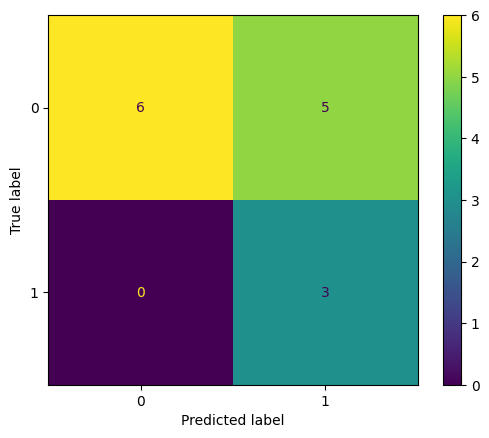

In [ ]:
task2_prediction=threshold(task2_test_data)
matrix=confusion_matrix(task2_prediction,task2_test_data['True Labels'],labels=new_model_random.classes_)
matrix_display=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=new_model_random.classes_)
matrix_display.plot()

In [ ]:
print('Evaluation of the task two in the test data')
accuracy_score(threshold(task2_test_data),task2_test_data['True Labels'])

Evaluation of the task two in the test data


0.6428571428571429

In summary, we have been able to classify individual micros with Random Forest model resulting in 68 % accuracy. A threshold (malignant perdiction percent of 35) was consequently selected upon the model which classfied whether a subject had cancer or not with an accuray of 64%